## 1.3 Vector Autoregressive (VAR) Models

The vector auto-regressive (VAR) process, where the predicted values are dependent on the past values of multiple variables, is a multivariate extension of the AR process. It is often useful in modelling multiple variables that exhibit correlation with their own past values as well as the past values of other variables. A VAR$(p)$ process for $k$ variables is given by

\begin{equation}\label{eq:11}
    \mathbf{y}_t = \mathbf{c} + \mathbf{A}_1\mathbf{y}_{t-1} +
    \mathbf{A}_2\mathbf{y}_{t-2} + \cdots +
    \mathbf{A}_p\mathbf{y}_{t-p} + \mathbf{e}_t
\end{equation}

or, in an expanded matrix notation,

\begin{equation}\label{eq:12}
    \begin{bmatrix}
    y_{1,t} \\
    y_{2,t} \\
    \vdots  \\
    y_{k,t} \\
    \end{bmatrix}
    = 
    \begin{bmatrix}
    c_1    \\
    c_2    \\
    \vdots \\
    c_k    \\
    \end{bmatrix}
    +
    \begin{bmatrix}
    a_{1,1}^1  & a_{1,2}^1  & \ldots  & a_{1,k}^1  \\
    a_{2,1}^1  & a_{2,2}^1  & \ldots  & a_{2,k}^1  \\ 
    \vdots     & \vdots     & \ddots  & \vdots     \\
    a_{k,1}^1  & a_{k,2}^1  & \ldots  & a_{k,k}^1  \\
    \end{bmatrix}
    \begin{bmatrix}
    y_{1,t-1} \\
    y_{2,t-1} \\
    \vdots    \\
    y_{k,t-1} \\
    \end{bmatrix}
    +
    \cdots
    +
    \begin{bmatrix}
    a_{1,1}^p  & a_{1,2}^p  & \ldots  & a_{1,k}^p  \\
    a_{2,1}^p  & a_{2,2}^p  & \ldots  & a_{2,k}^p  \\ 
    \vdots     & \vdots     & \ddots  & \vdots     \\
    a_{k,1}^p  & a_{k,2}^p  & \ldots  & a_{k,k}^p  \\
    \end{bmatrix}
    \begin{bmatrix}
    y_{1,t-p} \\
    y_{2,t-p} \\
    \vdots    \\
    y_{k,t-p} \\
    \end{bmatrix}
    +
    \begin{bmatrix}
    e_{1,t} \\
    e_{2,t} \\
    \vdots  \\
    e_{k,t} \\
    \end{bmatrix}
\end{equation}

<a id='1.3.1'></a>
### 1.3.1 Concise matrix form of VAR

The equation above can be represented in a concise matrix form as

\begin{equation} \label{eq:12}
    \mathbf{Y'} = \mathbf{B}\mathbf{Z'} + \mathbf{U'},
\end{equation}

where
* $\mathbf{Y'} \in \mathbb{R}^{K} = \mathbf{y}_t$,

* $\mathbf{B}  \in \mathbb{R}^{K \times (KP+1)} =
    \begin{bmatrix}
        \mathbf{c} & \mathbf{A}_{1} &  \mathbf{A}_{2} & \cdots  & \mathbf{A}_{p} 
    \end{bmatrix}$,
* $\mathbf{Z'} \in \mathbb{R}^{(KP+1)} =
    \begin{bmatrix}
        1                \\
        \mathbf{y}_{t-1} \\
        \mathbf{y}_{t-2} \\
        \vdots           \\
        \mathbf{y}_{t-p} \\
    \end{bmatrix}$,
* $\mathbf{U'} \in \mathbb{R}^{K} = \mathbf{e}_t$.

Furthermore, it is possible to generalize the VAR model by extending this equation to the multi-period case, where $T$ time-steps are modelled. Therefore, for $T$ time steps the equation becomes

\begin{equation} \label{eq:13}
    \mathbf{Y} = \mathbf{B}\mathbf{Z} + \mathbf{U},
\end{equation}

where 
* $\mathbf{Y} \in \mathbb{R}^{K \times T}$ =
    $\begin{bmatrix}
        \mathbf{y}_t  & \mathbf{y}_{t+1}  & \cdots  & \mathbf{y}_{t+T-1} \\ 
    \end{bmatrix}$,
    
* $\mathbf{B} \in \mathbb{R}^{K \times (KP+1)}$ =
    $\begin{bmatrix}
        \mathbf{c} & \mathbf{A}_{1} &  \mathbf{A}_{2} & \cdots  & \mathbf{A}_{p} \\ 
    \end{bmatrix}$,
* $\mathbf{Z} \in \mathbb{R}^{(KP+1) \times T}$ =
    $\begin{bmatrix}
        1                 & 1                  & \cdots  & 1                    \\
        \mathbf{y}_{t-1}  & \mathbf{y}_{t}     & \cdots  & \mathbf{y}_{t+T-2}   \\
        \mathbf{y}_{t-2}  & \mathbf{y}_{t-1}   & \cdots  & \mathbf{y}_{t+T-3}   \\
        \vdots            & \vdots             & \ddots  & \vdots               \\
        \mathbf{y}_{t-p}  & \mathbf{y}_{t-p+1} & \cdots  & \mathbf{y}_{t+T-p-1} \\
    \end{bmatrix}$,
* $\mathbf{U} \in \mathbb{R}^{K \times T}$ =
     $\begin{bmatrix}
        \mathbf{e}_t  & \mathbf{e}_{t+1}  & \cdots  & \mathbf{e}_{t+T-1} \\ 
    \end{bmatrix}$.




<a id='1.3.2'></a>
### 1.3.2 Optimal VAR coefficients

In order to find the optimal set of coefficients, $\mathbf{B}_{\text{opt}}$, we aim to minimize $\mathbf{U} = \mathbf{Y} - \mathbf{B}\mathbf{Z}$, which represents the error in the model. Then to estimate the optimal set of coefficients in a least-squares fashion, we set up the following optimisation problem with the objective function $J(\mathbf{B}) \in \mathbb{R}^{K \times K}$:

\begin{equation}
    J(\mathbf{B}) = \mathbf{U}\mathbf{U}^T = 
    (\mathbf{Y} - \mathbf{B}\mathbf{Z}) (\mathbf{Y} - \mathbf{B}\mathbf{Z})^T,
\end{equation}
\begin{equation*}
    J(\mathbf{B}) = \mathbf{Y}\mathbf{Y}^T
    - \mathbf{B}\mathbf{Z}\mathbf{Y}^T - \mathbf{Y}\mathbf{Z}^T\mathbf{B}^T
    + \mathbf{B}\mathbf{Z}\mathbf{Z}^T\mathbf{B}^T.
\end{equation*}

Then, by setting the derivative of the objective function to 0, we solve for $\mathbf{B}_{\text{opt}}$ that minimizes this function:

\begin{align*}
    \frac{\partial J(\mathbf{B})}{\partial \mathbf{B}} = \mathbf{0}
    \hspace{15pt} &\Rightarrow \hspace{15pt}
    2 \mathbf{B}\mathbf{Z}\mathbf{Z}^T - 2\mathbf{Y}\mathbf{Z}^T = \mathbf{0} \\
    \mathbf{B}\mathbf{Z}\mathbf{Z}^T &= \mathbf{Y}\mathbf{Z}^T 
\end{align*}

\begin{equation}
    \mathbf{B}_{\text{opt}} = \mathbf{Y}\mathbf{Z}^T (\mathbf{Z}\mathbf{Z}^T)^{-1} 
\end{equation}

<a id='1.3.3'></a>
### 1.3.3 Stability of VAR

We consider a VAR(1) process, i.e.

\begin{align*}
    \mathbf{y}_t     &= \mathbf{A}\mathbf{y}_{t-1} + \mathbf{e}_t     \\
    \mathbf{y}_{t-1} &= \mathbf{A}\mathbf{y}_{t-2} + \mathbf{e}_{t-1} \\
    \mathbf{y}_{t-2} &= \mathbf{A}\mathbf{y}_{t-3} + \mathbf{e}_{t-2} \\
    &\hspace{4pt} \vdots
\end{align*}

Recursively substituting the equations above, we can rewrite $\mathbf{y}_t$ as

\begin{align}
    \mathbf{y}_t &= \mathbf{A}\mathbf{y}_{t-1} + \mathbf{e}_t     \nonumber\\
    &= \mathbf{A}(\mathbf{A}\mathbf{y}_{t-2} + \mathbf{e}_{t-1}) + \mathbf{e}_t \nonumber\\ 
    &= \mathbf{A}^2\mathbf{y}_{t-2} + \mathbf{A}\mathbf{e}_{t-1} + \mathbf{e}_{t} \nonumber\\
    &\hspace{4pt} \vdots \nonumber\\
    \mathbf{y}_t &= \mathbf{A}^t\mathbf{y}_{0} 
    + \mathbf{A}^{t-1}\mathbf{e}_{1} + \mathbf{A}^{t-2}\mathbf{e}_{2} 
    + \cdots + \mathbf{A}\mathbf{e}_{t-1} + \mathbf{e}_{t}. \label{eq:16}
\end{align}

Assuming matrix $\mathbf{A}$ is diagonalizable, that is assuming $\textbf{A}$ has $k$ independent eigenvectors with corresponding eigenvalues, we can write

\begin{equation*}
    \mathbf{A} = \mathbf{V}\mathbf{\Lambda}\mathbf{V}^{-1},
\end{equation*}

where $\textbf{V}$ is a matrix composed of $k$ independent eigenvectors, and $\mathbf{\Lambda}$ is a diagonal matrix with the corresponding eigenvalues on the diagonals. For higher orders of matrix $\textbf{A}$, we can then write

\begin{align} 
    \mathbf{A}^2 &= \mathbf{V}\mathbf{\Lambda}\mathbf{V}^{-1}\mathbf{V}\mathbf{\Lambda}\mathbf{V}^{-1} = \mathbf{V}\mathbf{\Lambda}^2\mathbf{V}^{-1}, \nonumber\\
    \mathbf{A}^n &= \mathbf{V}\mathbf{\Lambda}^n\mathbf{V}^{-1}. \label{eq:17}
\end{align}

Combining the equations for $\mathbf{y}_t$ and $\mathbf{A}$, we have

\begin{equation}\label{eq:18}
    \mathbf{y}_t = 
    \mathbf{V}(
    \mathbf{\Lambda}^t\mathbf{y}_{0} 
    + \mathbf{\Lambda}^{t-1}\mathbf{e}_{1} + \mathbf{\Lambda}^{t-2}\mathbf{e}_{2} 
    + \cdots + \mathbf{\Lambda}\mathbf{e}_{t-1} 
    )\mathbf{V}^{-1}
    + \mathbf{e}_{t}
\end{equation}

From the equation above, we observe that if one of the eigenvalues located on the diagonal of $\mathbf{\Lambda}$ is not less than 1 in absolute value, the value of $\mathbf{y}_t$ becomes unbounded. Therefore, we conclude that, for stability, all the eigenvalues of matrix $\textbf{A}$ must be less than 1 in absolute value.

<a id='1.3.4'></a>
### 1.3.4 VAR analysis for portfolio construction I

We will now explore how VAR models can aid in the construction of portfolios. We first examine the close price time-series of five stocks, `['CAG', 'MAR', 'LIN', 'HCP', 'MAT']`, and detrend the signals using the moving average of 66 days (corresponding to 3 × 22, i.e. one quarter) so that we have zero-mean stationary time-series. The original and detrended series are plotted in the figure below.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from statsmodels.tsa.api import VAR

# Set path for generated figures
fig_path = './figures_1.3/'

In [2]:
# Read data
mydateparser = lambda x: datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv('snp_allstocks_2015_2019.csv', index_col='Date', parse_dates=True, date_parser=mydateparser)
info = pd.read_csv('snp_info.csv', index_col=0) 

In [3]:
# Select stocks to analyze 
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]

# Detrend with moving average of 66 days (one quarter)
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


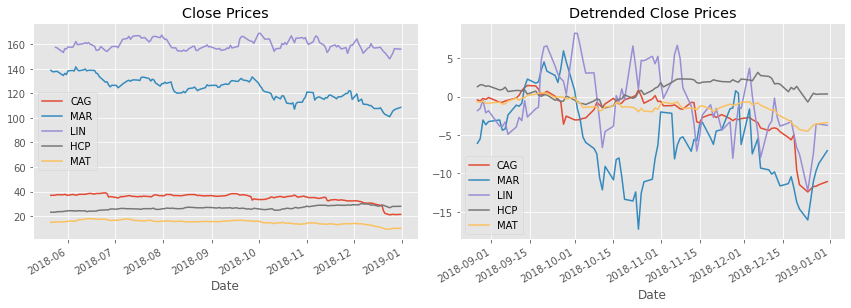

In [4]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
fig.tight_layout()

stocks[-155:].plot(ax=axes[0]); axes[0].set_title("Close Prices")
stocks_detrended.plot(ax=axes[1]); axes[1].set_title("Detrended Close Prices")

fig.savefig(fig_path+'Stock_prices_with_detrended.eps', dpi=200, bbox_inches='tight')

We then fit a VAR(1) model to these time-series and obtain the regression matrix $\mathbf{A}$ as 

In [5]:
model = VAR(stocks_detrended)
results = model.fit(1)
results.params[1:]

/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


,CAG,MAR,LIN,HCP,MAT
L1.CAG,0.872786,0.113179,-0.281265,0.011912,0.058776
L1.MAR,-0.063745,0.895820,-0.184820,-0.005004,0.022917
L1.LIN,0.000134,-0.111678,0.704023,0.004982,-0.025557
L1.HCP,-0.084776,-0.083831,-0.401417,0.931708,-0.046406
L1.MAT,0.643072,0.094931,2.033036,-0.012884,0.802974


and compute the eigenvalues of $\mathbf{A}$ to be

In [6]:
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)
print(eigA)

[0.71449288+0.12927613j 0.71449288-0.12927613j 1.00635964+0.j
 0.86051894+0.j         0.91144512+0.j        ]


Notice that the highest values of $\mathbf{A}$ are sitting on the diagonal which is expected since it indicates the time-series values correlate with their own past values. The non-diagonal values, however, are in general close to 0, indicating the assets are uncorrelated with each other, which is expected since they are mostly from different industries (see table below for sector allocation). Therefore, in order to diversify risk, it makes sense to construct a portfolio using these five assets which are uncorrelated with each other. Also note that $\lambda_2$ is larger than 1 and that this might create instability issues as discussed in section [1.3.3](#1.3.3).

In [7]:
info.set_index('Symbol').T[tickers].loc['GICS Sector'].to_frame()

,GICS Sector
Symbol,
CAG,Consumer Staples
MAR,Consumer Discretionary
LIN,Materials
HCP,Real Estate
MAT,Consumer Discretionary


<a id='1.3.5'></a>
### 1.3.5 VAR analysis for portfolio construction II

Following a similar process in [1.3.4](#1.3.4), we apply the VAR(1) model to entire sectors, such as Industrials, Health Care, Information Technology, etc. and obtain the regression matrix $\mathbf{A}$ together with its eigenvalues for each sector.

**From the results, we can see that stocks from same sectors correlate with each other???????? ?????????????**

In general, in order to diversify risk, it is not advisable to construct a portfolio with all stocks from the same sector. The overall expected return of a portfolio with $n$ assets is $\bar{r}_p = \sum_{i=1}^n w_i \bar{r}_i$, while the variance of this return is $\sigma^2 = \sum_{i,j = 1}^n w_i \sigma_{ij} w_j$, where $\bar{r}_i$ is the expected return of asset $i$, $w_i$ is the weight assigned to asset $i$, and $\sigma_{ij}$ is the covariance between assets $i$ and $j$. 

For a given target return, investors aim to minimize the risk of this return, which is represented by the variance. To minimize the variance of the return, we have to choose assets with uncorrelated returns. Since assets within the same sector are generally correlated, it is more advisable to construct portfolios using assets from different sectors that are uncorrelated. 


In [8]:
matrix_A_by_sector = {}
eigen_vals = {}

for sector in info['GICS Sector'].unique():

    # get stocks from the same sector
    tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].tolist()
    stocks = df[tickers]
    
    # detrend signals
    stocks_ma = stocks.rolling(window=66).mean()
    stocks_detrended = stocks.sub(stocks_ma).dropna()
    
    # fit VAR model
    model = VAR(stocks_detrended)
    results = model.fit(1)
    
    # get regression matrix A and its eigenvalues
    A = results.params[1:]
    eigA, _ = np.linalg.eig(results.params[1:].values)
    
    matrix_A_by_sector[sector] = A
    eigen_vals[sector] = eigA
    

/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model

In [9]:
eigen_vals['Industrials']

array([0.30898365+0.20579796j, 0.30898365-0.20579796j,
       0.38774011+0.15973564j, 0.38774011-0.15973564j,
       0.37441871+0.08362775j, 0.37441871-0.08362775j,
       0.40240072+0.j        , 0.57266598+0.27585727j,
       0.57266598-0.27585727j, 0.50628132+0.19819543j,
       0.50628132-0.19819543j, 0.45996978+0.05100044j,
       0.45996978-0.05100044j, 0.47008373+0.j        ,
       0.5506172 +0.15327462j, 0.5506172 -0.15327462j,
       0.61494857+0.20470522j, 0.61494857-0.20470522j,
       0.5595859 +0.j        , 0.68183875+0.21126093j,
       0.68183875-0.21126093j, 0.7695556 +0.2232116j ,
       0.7695556 -0.2232116j , 0.69423291+0.17615432j,
       0.69423291-0.17615432j, 0.65335394+0.11028367j,
       0.65335394-0.11028367j, 0.62945386+0.j        ,
       0.68009607+0.04286244j, 0.68009607-0.04286244j,
       0.84001094+0.17702412j, 0.84001094-0.17702412j,
       0.81128295+0.14700475j, 0.81128295-0.14700475j,
       0.76491978+0.06720231j, 0.76491978-0.06720231j,
       0.9

In [10]:
matrix_A_by_sector['Industrials']

,MMM,ALK,ALLE,AAL,AME,AOS,ARNC,BA,CHRW,CAT,...,TXT,TDG,UNP,UAL,UPS,URI,UTX,VRSK,WM,XYL
L1.MMM,0.814441,-0.110406,-0.019521,-0.037429,-0.010927,-0.033686,-0.013657,-0.128515,0.013267,-0.076864,...,-0.015181,-0.131768,-0.024305,-0.028021,0.013214,-0.063712,0.030831,0.032662,0.030217,-0.009209
L1.ALK,-0.120950,0.766664,-0.058600,-0.034548,-0.068473,-0.048836,-0.009074,-0.160592,-0.116783,-0.152605,...,-0.034417,-0.227694,-0.095748,-0.022642,-0.089234,-0.126615,-0.095956,-0.004106,-0.085805,-0.049754
L1.ALLE,0.138810,0.061226,0.810449,0.026059,0.029829,0.003307,0.064876,0.296377,0.108719,0.035480,...,0.001417,0.127083,0.013345,0.015899,0.056104,-0.093804,0.048086,0.087936,0.035234,0.051461
L1.AAL,0.454229,0.024691,0.164866,0.859345,0.151324,0.113848,0.008693,0.591173,0.097750,0.395927,...,0.084487,0.270583,0.072920,-0.082577,0.203849,0.472364,0.106074,0.029851,0.083745,0.132673
L1.AME,0.307632,0.103631,0.036363,-0.011590,0.711288,0.033481,0.016511,-0.200716,-0.096150,0.093686,...,-0.056117,0.207494,-0.041045,-0.044154,-0.025254,0.065381,0.034798,-0.060386,0.033143,0.111389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L1.URI,-0.019881,0.001113,-0.004489,0.017374,0.004591,-0.010048,0.017252,-0.007405,0.013463,0.037474,...,0.002623,-0.086948,-0.023220,0.005229,-0.052797,0.774429,0.004730,0.018318,-0.017194,0.005975
L1.UTX,-0.164831,-0.001536,-0.083980,0.026073,-0.033931,-0.080519,-0.002652,-0.377503,-0.059657,-0.125992,...,-0.037840,-0.272057,-0.059786,0.030789,0.008064,-0.055490,0.657435,-0.003586,-0.025792,-0.074709
L1.VRSK,-0.045287,0.057162,-0.005364,0.009653,-0.010922,-0.025839,-0.002281,-0.259805,0.011264,0.018755,...,0.000544,0.321402,0.038716,0.041934,0.094172,-0.006506,0.015205,0.779715,0.045576,0.000399
L1.WM,-0.070201,-0.076536,0.071380,0.049149,-0.000202,0.031965,0.097831,0.053286,-0.131804,-0.005781,...,-0.062988,0.316026,-0.272578,-0.145483,-0.296200,0.149778,-0.125157,0.035635,0.580993,0.003440


In [11]:
eig_vals_df = pd.DataFrame(index=eigen_vals.keys(), columns=['min', 'mean', 'max'], dtype=float)

for sector in eigen_vals:
    eig_vals = abs(eigen_vals[sector])
    eig_vals_df.loc[sector]['min'] = eig_vals.min()
    eig_vals_df.loc[sector]['mean'] = eig_vals.mean()    
    eig_vals_df.loc[sector]['max'] = eig_vals.max()   

eig_vals_df

,min,mean,max
Industrials,0.371246,0.763932,0.991721
Health Care,0.092157,0.621440,0.994153
Information Technology,0.374081,0.809351,0.992738
Communication Services,0.752488,0.926293,0.982263
Consumer Discretionary,0.447563,0.810433,0.990650
Utilities,0.042115,0.599877,0.985648
Financials,0.152575,0.631218,1.004340
Materials,0.137838,0.621833,0.991744
Real Estate,0.763563,0.919369,0.982785
Consumer Staples,0.546458,0.852121,0.991508
